In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Company,job_location,age,req_python,req_excel,req_git,req_tableau,req_sql,req_tensorflow,req_powerbi
0,Data Scientist,$65K-$108K (Glassdoor est.),"HPOne, named CT Magazine's 2018 Great Places t...",3.6,HPOne\n3.6,"Trumbull, CT",501 to 1000 Employees,2006,Company - Private,Insurance Carriers,...,HPOne,CT,15,1,1,0,1,0,0,0
1,Sr Data Scientist,$66K-$110K (Glassdoor est.),A world leader in the field of in vitro diagno...,4.2,Biomerieux\n4.2,"Saint Louis, MO",10000+ Employees,1963,Company - Private,Biotech & Pharmaceuticals,...,Biomerieux,MO,58,1,1,0,0,0,0,0
2,Senior Scientist I,$64K-$139K (Glassdoor est.),Job Description Summary\nThe successful candid...,3.7,BD\n3.7,"San Diego, CA",10000+ Employees,1897,Company - Public,Health Care Products Manufacturing,...,BD,CA,124,0,0,0,0,0,0,0
3,Scientist II,$43K-$96K (Glassdoor est.),"Job Description Summary\nBD Biosciences, the l...",3.7,BD\n3.7,"San Diego, CA",10000+ Employees,1897,Company - Public,Health Care Products Manufacturing,...,BD,CA,124,0,0,0,0,0,0,0
4,Reagent Scientist II,$43K-$96K (Glassdoor est.),Job Description Summary\nBD is seeking a Reage...,3.7,BD\n3.7,"San Diego, CA",10000+ Employees,1897,Company - Public,Health Care Products Manufacturing,...,BD,CA,124,0,1,0,0,0,0,0


In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower() or 'ml' in title.lower() or 'ai' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['job_title_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_title_simp.value_counts()

data scientist    297
data analyst       91
data engineer      55
mle                18
na                 14
manager             2
director            1
Name: job_title_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

na        374
senior    104
Name: seniority, dtype: int64

In [9]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3577
1      4591
2      4657
3      3635
4      3475
       ... 
473    2855
474    4870
475    3065
476    4000
477    5576
Name: desc_len, Length: 478, dtype: int64

In [10]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
19,1,17,23
391,1,38,61
392,1,38,61
393,1,38,61
394,1,38,61
395,1,38,61
396,1,38,61
397,1,38,61
398,1,38,61
399,1,38,61


In [11]:
#轉換時薪成年薪（年薪大約為時薪*2）
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
19,1,34,46
391,1,76,122
392,1,76,122
393,1,76,122
394,1,76,122
395,1,76,122
396,1,76,122
397,1,76,122
398,1,76,122
399,1,76,122


In [13]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,age,req_python,req_excel,req_git,req_tableau,req_sql,req_tensorflow,req_powerbi,desc_len
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,3.287866,1590.328452,0.125523,83.123431,139.146444,101.248954,32.843096,0.529289,0.510460,0.196653,0.169456,0.479079,0.096234,0.020921,4113.207113
std,1.565515,788.887606,0.331658,31.532012,51.517837,33.575859,37.850894,0.499664,0.500414,0.397884,0.375547,0.500086,0.295221,0.143268,1656.151212
min,-1.000000,-1.000000,0.000000,30.000000,46.000000,20.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,675.000000
25%,3.300000,1897.000000,0.000000,63.000000,105.000000,82.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3002.250000
50%,3.700000,1983.000000,0.000000,75.000000,122.000000,89.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3946.000000
75%,4.100000,2004.000000,0.000000,112.000000,176.000000,125.500000,44.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4966.000000
max,5.000000,2019.000000,1.000000,160.000000,276.000000,167.000000,204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11436.000000


<AxesSubplot:>

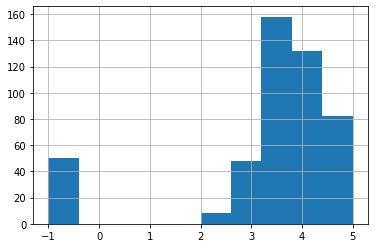

In [14]:
#make histogram(直方圖)
df.Rating.hist()

<AxesSubplot:>

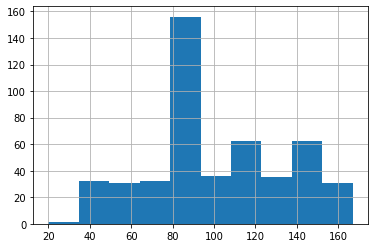

In [15]:
df.avg_salary.hist()

<AxesSubplot:>

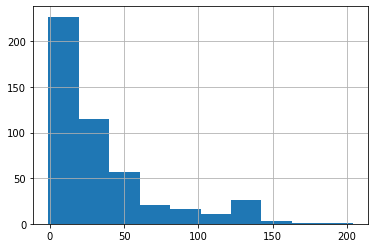

In [16]:
df.age.hist()

<AxesSubplot:>

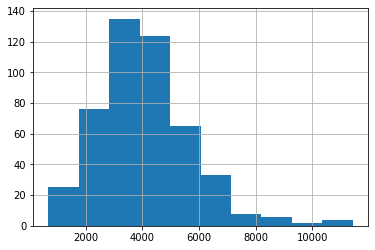

In [17]:
df.desc_len.hist()

<AxesSubplot:>

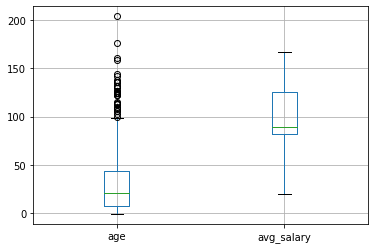

In [18]:
#make box plot(盒鬚圖)
df.boxplot(column = ['age','avg_salary'])

<AxesSubplot:>

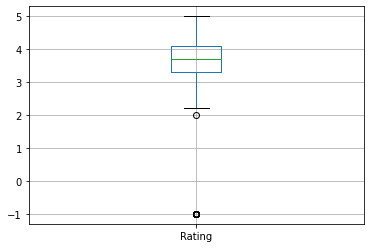

In [19]:
df.boxplot(column = ['Rating'])

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'Company', 'job_location', 'age', 'req_python',
       'req_excel', 'req_git', 'req_tableau', 'req_sql', 'req_tensorflow',
       'req_powerbi', 'job_title_simp', 'seniority', 'desc_len'],
      dtype='object')

In [21]:
df[['Rating','age','avg_salary','desc_len']].corr()

,Rating,age,avg_salary,desc_len
Rating,1.000000,0.263603,-0.029642,-0.035753
age,0.263603,1.000000,0.017681,0.160983
avg_salary,-0.029642,0.017681,1.000000,-0.023709
desc_len,-0.035753,0.160983,-0.023709,1.000000


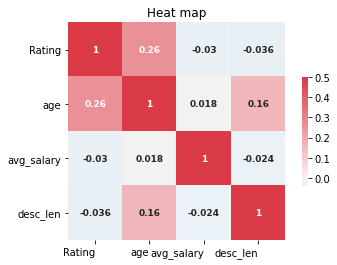

In [22]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)
ax = sns.heatmap(df[['Rating','age','avg_salary','desc_len']].corr(), vmax=.5, center=0, cmap=cmap, square=True, cbar_kws={"shrink": .5}, annot=True, annot_kws={'size':9,'weight':'bold'})
#set format
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=0, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=0, horizontalalignment='right')
plt.title('Heat map')
plt.savefig('Correlations.png')
plt.show()

In [23]:
df_cat = df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company', 'job_location', 'req_python', 'req_excel',
       'req_git', 'req_tableau', 'req_sql', 'req_tensorflow', 'req_powerbi', 'job_title_simp', 'seniority']]

graph for Location: total = 221


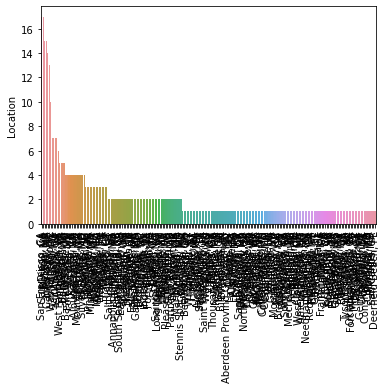

graph for Size: total = 9


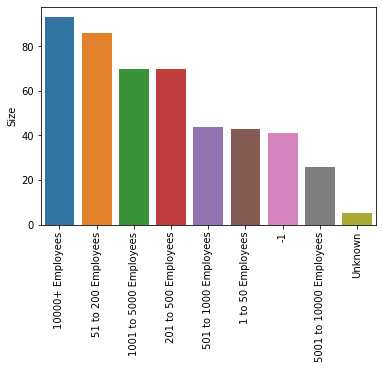

graph for Type of ownership: total = 12


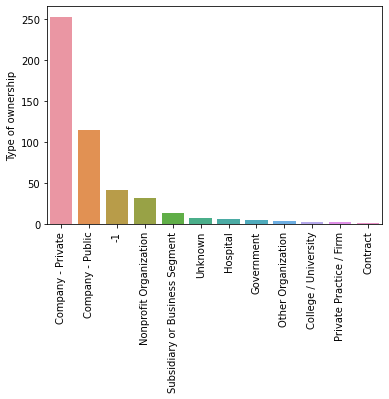

graph for Industry: total = 59


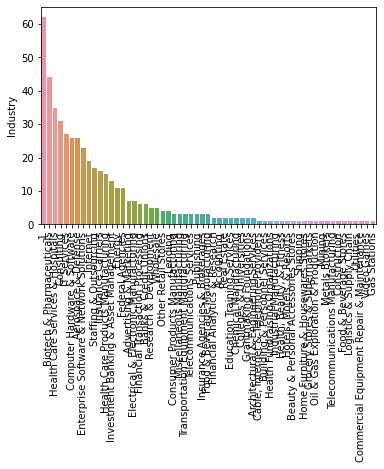

graph for Sector: total = 23


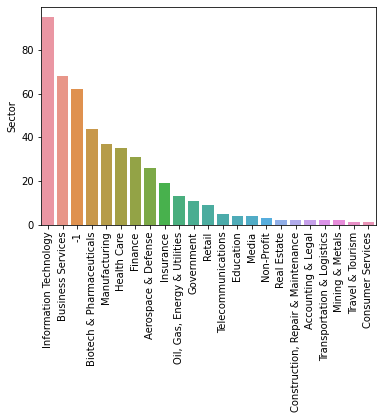

graph for Revenue: total = 14


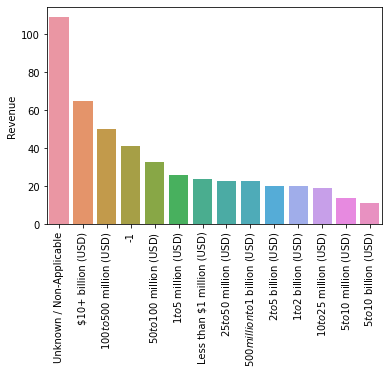

graph for Company: total = 330


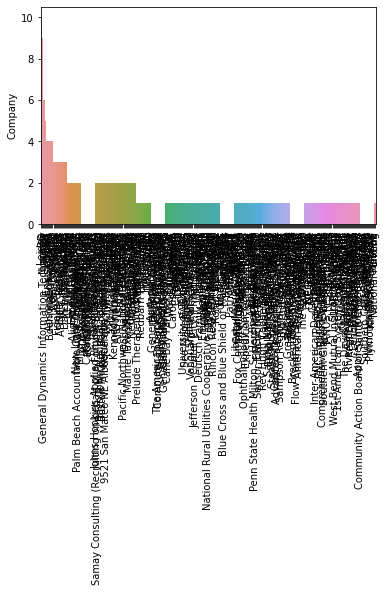

graph for job_location: total = 42


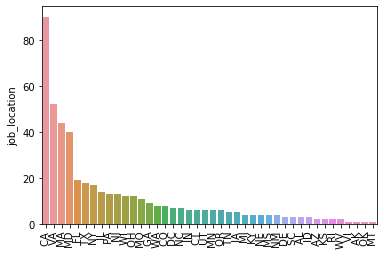

graph for req_python: total = 2


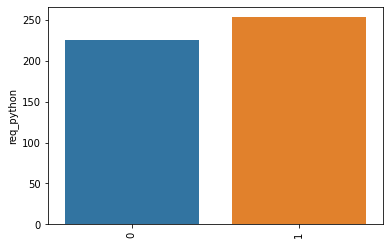

graph for req_excel: total = 2


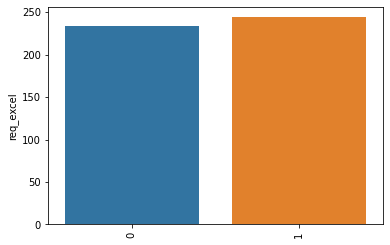

graph for req_git: total = 2


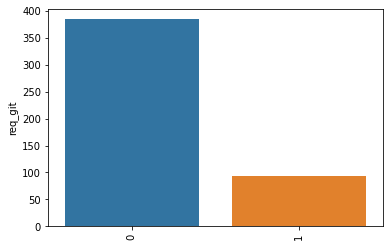

graph for req_tableau: total = 2


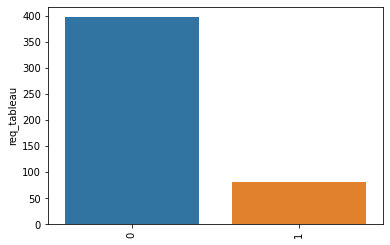

graph for req_sql: total = 2


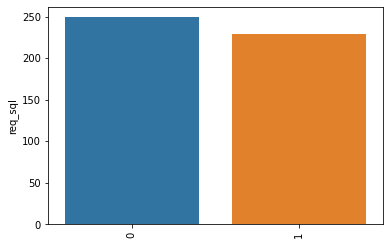

graph for req_tensorflow: total = 2


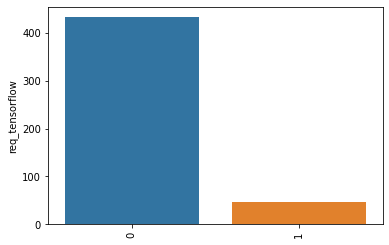

graph for req_powerbi: total = 2


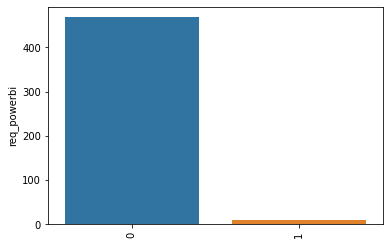

graph for job_title_simp: total = 7


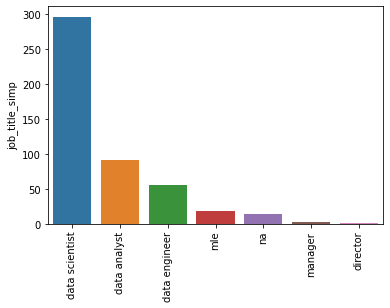

graph for seniority: total = 2


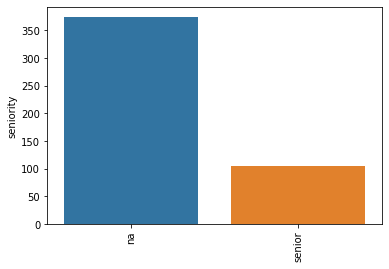

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


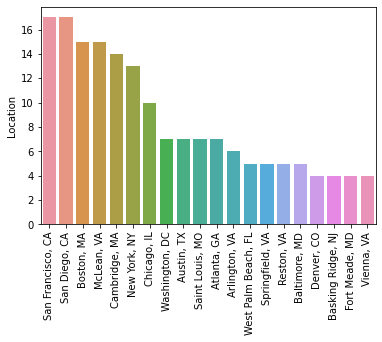

graph for Company: total = 20


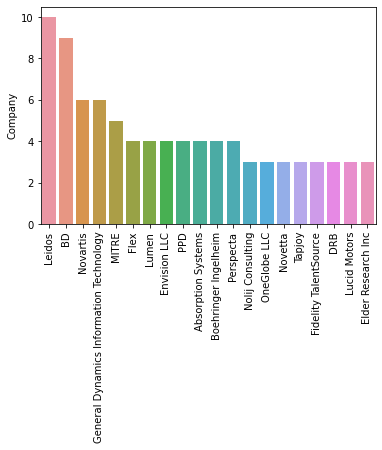

In [25]:
#show Location and Company top 20
for i in df_cat[['Location', 'Company']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
#各職位的平均薪資
salary_by_job_postion = pd.pivot_table(df, index = 'job_title_simp', values = 'avg_salary').sort_values('avg_salary', ascending = False)
dfi.export(salary_by_job_postion, 'salary_by_job_postion.png')

In [27]:
#各州中各職位的平均薪資
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_location', 'job_title_simp'], values = 'avg_salary').sort_values('job_location')

avg_salary
job_location job_title_simp            
 AK          data scientist   82.000000
 AL          data analyst    144.000000
             data scientist  103.000000
             na               48.500000
 AZ          data analyst     49.500000
             data engineer   109.000000
 CA          data analyst     96.545455
             data engineer   101.050000
             data scientist   97.555556
             mle             105.500000
             na               49.500000
 CO          na               82.000000
             data analyst     89.500000
             data scientist  113.900000
 CT          data engineer    87.000000
             data scientist   99.500000
 DC          data analyst     48.500000
             data engineer   119.750000
             data scientist   96.500000
             director         89.000000
 DE          data scientist  121.333333
 FL          data engineer    84.000000
             data analyst    114.875000
             data scientist  110.700000
 GA          data scientist  119.312500
             data engineer   144.000000
 IA          data analyst    142.000000
             data scientist  122.000000
 ID          data analyst     85.500000
             data scientist   84.000000
 IL          data analyst    116.500000
             data engineer    48.500000
             data scientist   93.250000
             na              167.000000
 IN          data scientist  100.250000
             data analyst     45.000000
             data engineer    82.000000
 KS          data scientist  113.000000
 KY          data analyst    109.000000
             data scientist   71.500000
 MA          data analyst    116.416667
             data engineer    82.916667
             data scientist  106.000000
 MD          data analyst    102.500000
             data engineer    86.500000
             data scientist  114.482759
             na              107.700000
 MI          data scientist  142.000000
             mle             109.000000
             data engineer    87.500000
 MN          manager         100.500000
             data scientist   96.000000
             data engineer    49.500000
             data analyst     82.000000
 MO          data analyst     89.000000
             data scientist  107.550000
 MS          data analyst    101.333333
             data scientist   76.000000
 MT          data scientist  103.000000
 NC          data scientist  108.428571
 NE          data analyst    142.000000
             data scientist  100.500000
 NJ          data scientist  121.071429
             mle             129.250000
             data analyst     87.000000
             data engineer    87.500000
 NM          data analyst     79.833333
             na               48.500000
 NY          data analyst     77.714286
             data scientist  112.416667
             mle             100.500000
             na               68.750000
 OH          data analyst    105.583333
             data scientist   53.800000
             mle             125.500000
 OK          data analyst     87.000000
 OR          data engineer   144.000000
             data scientist  133.300000
 PA          data scientist   89.300000
             data analyst     84.333333
 RI          data analyst     76.000000
             data scientist  103.000000
 SC          data analyst    103.000000
             data scientist   89.000000
             na               87.000000
 TN          data engineer    62.375000
             data scientist  103.000000
 TX          mle              65.250000
             data scientist   98.181818
             na               82.000000
             data analyst    100.333333
             data engineer    76.000000
 UT          data engineer    84.000000
             data scientist  107.625000
 VA          data analyst    115.437500
             data engineer    92.200000
             data scientist  103.596154
             mle             107.000000
 VI          data analyst    

In [28]:
#各州中 data scientist 的平均薪資
ds_salary_by_location = pd.pivot_table(df[df.job_title_simp == 'data scientist'], index = 'job_location', values = 'avg_salary').sort_values('avg_salary', ascending = False)
dfi.export(ds_salary_by_location, 'ds_salary_by_location.png')

In [29]:
df_pivots = df[['Size','Industry', 'Sector', 'Revenue', 'hourly', 'age', 'req_python', 'req_excel', 'req_git', 'req_tableau', 'req_sql', 'req_tensorflow', 'req_powerbi', 'Type of ownership','avg_salary']]

In [30]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Size
                         avg_salary
Size                               
1001 to 5000 Employees   108.871429
5001 to 10000 Employees  104.576923
-1                       104.475610
51 to 200 Employees      103.325581
201 to 500 Employees     101.314286
1 to 50 Employees         97.000000
10000+ Employees          96.758065
501 to 1000 Employees     95.204545
Unknown                   87.400000
Industry
                                           avg_salary
Industry                                             
Commercial Equipment Repair & Maintenance  167.000000
Industrial Manufacturing                   144.000000
Grantmaking Foundations                    138.750000
Miscellaneous Manufacturing                131.000000
Architectural & Engineering Services       127.000000
Energy                                     118.318182
Advertising & Marketing                    113.500000
Electrical & Electronic Manufacturing      111.928571
Lending                                    111.875

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [31]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

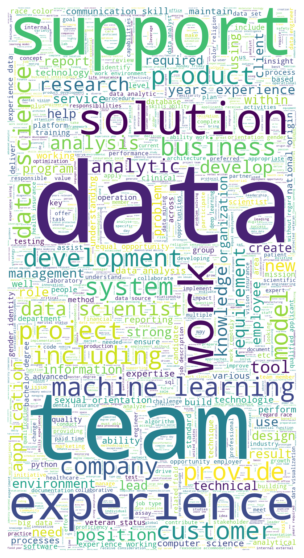

In [32]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
wc.to_file('wordcloud.png')

In [34]:
df.to_csv('eda_data.csv')